# **Hypothesis Testing**

## **Introduction**

### At this point, we have done quiet a bit of visualizing our data and already examined a few of the relationships that exist within it. Now, however, we want to start to make real statements about the data and the relationships. As such, we need to start doing some statistical tests on our data to see if any of the patterns that exist are statistically significant over the entire population of our data

### Lets do some quick review of basic stats lingo. When doing hypothesis testing, we generally have two conflicting hypotheses. The null hypthesis, and the alternative hypothesis. The null hypothesis states there is no significant difference between the things being compared, and the alternative is the opposite (that there is a true difference).

### The significance level (sometimes denoted as alpha) is the probality that we can reject the null hypothesis when it is true. This commonly gets set to .05. If you use a value of .05, this means that you accept the fact that you will reject the null hypothesis when it is actually true. In the context of testing a drug, if you use a significance level of .05 and show that you have a statistically significant effect from your drug, there is a 5% chance that you rejected the null hypothesis (which in this case would be that the drug doesn't work) and said it does (confirming the alternative hypothesis), when in fact the drug does not work at all.

### Statistical tests are the tests you implement to derive a test statistic that you can use to reject the null hypothesis. We will cover the implementation and use cases of t-tests, anovas, fischer exact, and chi squared, so dont worry about this too much now. 

### It is also now important to bring up type 1 and type 2 errors and what they mean in the context of hypothesis testing. A type 1 error is when you reject the null hypothesis when is it is actually true (false positive) and a type 2 error is when you do not reject the null hypothesis when it is false (false negative). The probability of a type 2 error is denoted as beta, and the power of the test (which is the probablity of correctly rejecting the false null hypothesis) is 1-beta.

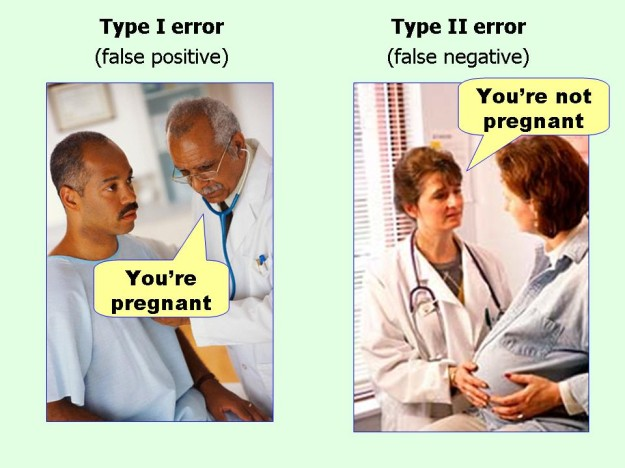

### It is important to keep in mind the assumptions you make when doing statistics and know that the statements you make about your data are based on these assumptions. Also, just because something is statistically significant, DOES NOT ALWAYS MAKE IT REAL! It only suggests that the alternative hypothesis you were testing had sufficient evidence based on your data to make it true.

## **Import stuff**

In [ ]:
%pip install seaborn
%pip install statsmodels


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact


### Same code as in the first module. You can skip this- we are just applying the same cleaning and preprocessing we did before in this notebook

In [2]:
df = pd.read_csv('heart_disease.csv')

df.dropna(inplace=True)

categorical_columns = ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart_stroke']

for column in categorical_columns:
    df[column] = df[column].astype('category')
        
text_columns = ['Gender', 'education', 'prevalentStroke', 'Heart_stroke']

for column in text_columns: 
    df[column] = df[column].str.lower()
    
df['prevalentStroke'] = df['prevalentStroke'].map({'yes': 1, 'no': 0})
df['Heart_stroke'] = df['Heart_stroke'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['education'] = df['education'].map({'uneducated': 0, 'primaryschool': 1, 'graduate':2, 'postgraduate':3})

## T-Tests

### Lets now do some t-tests, everyones favorite :D. 

###  The t-test is a tool to compare the averages of two groups and see if they're statistically different. To do this, it calculates a value (the test statistic) based on the sample data. If there's no real difference between the groups, this value should look like it came from a t-distribution (basically like a normal distribution with heavier tails). The test works best when the data is normally distributed (roughly bell-shaped) and we can estimate how spread out the data is around the average.


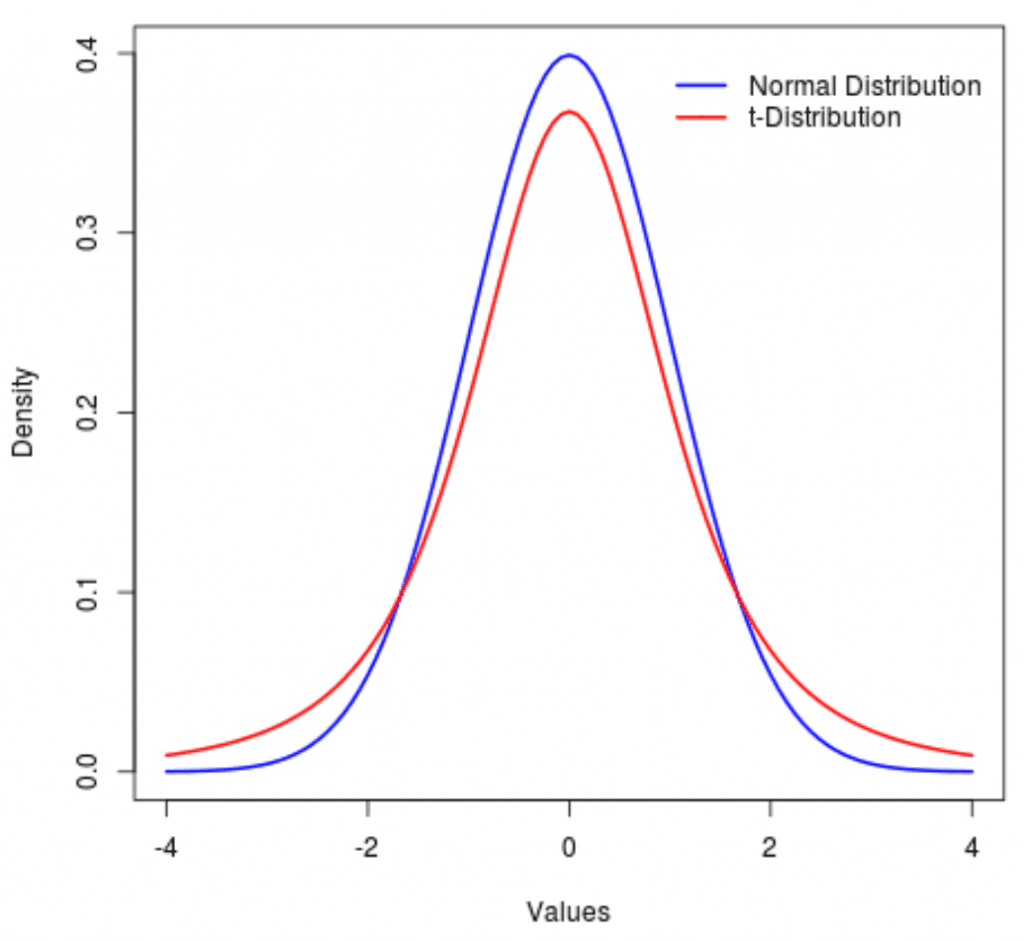

### There are different types of t-tests depending on the specific question you are asking:

1. ### One-sample t-test: When you are asking the question "Is the mean of a single sample significantly different from a specific value?", you can use a one-sample t-test.

2. ### Independent two-sample t-test: When you are asking the question "Is the mean of one group significantly different from the mean of another group?", you can use an independent two-sample t-test.

3. ### Paired two-sample t-test: When you are asking the question "Is the mean of one group significantly different from the mean of another group, where the two groups are related or paired?", you can use a paired two-sample t-test.

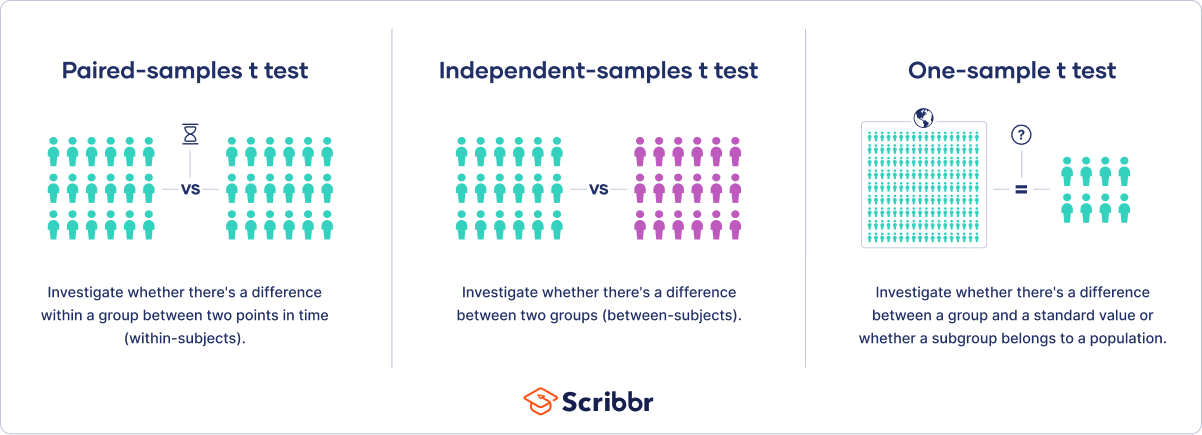

T-tests in scipy output a t-statistic and a p-value. A t-statistic quantifies the difference between groups being analyzed relative to the variability within the groups (higher t-statistic, groups more different). The p-value represents the probability of obtaining the observed results, assuming that the null hypothesis is true. A p value less than the significance level allows you to accept the alternative hypothesis and reject the null hypothesis.
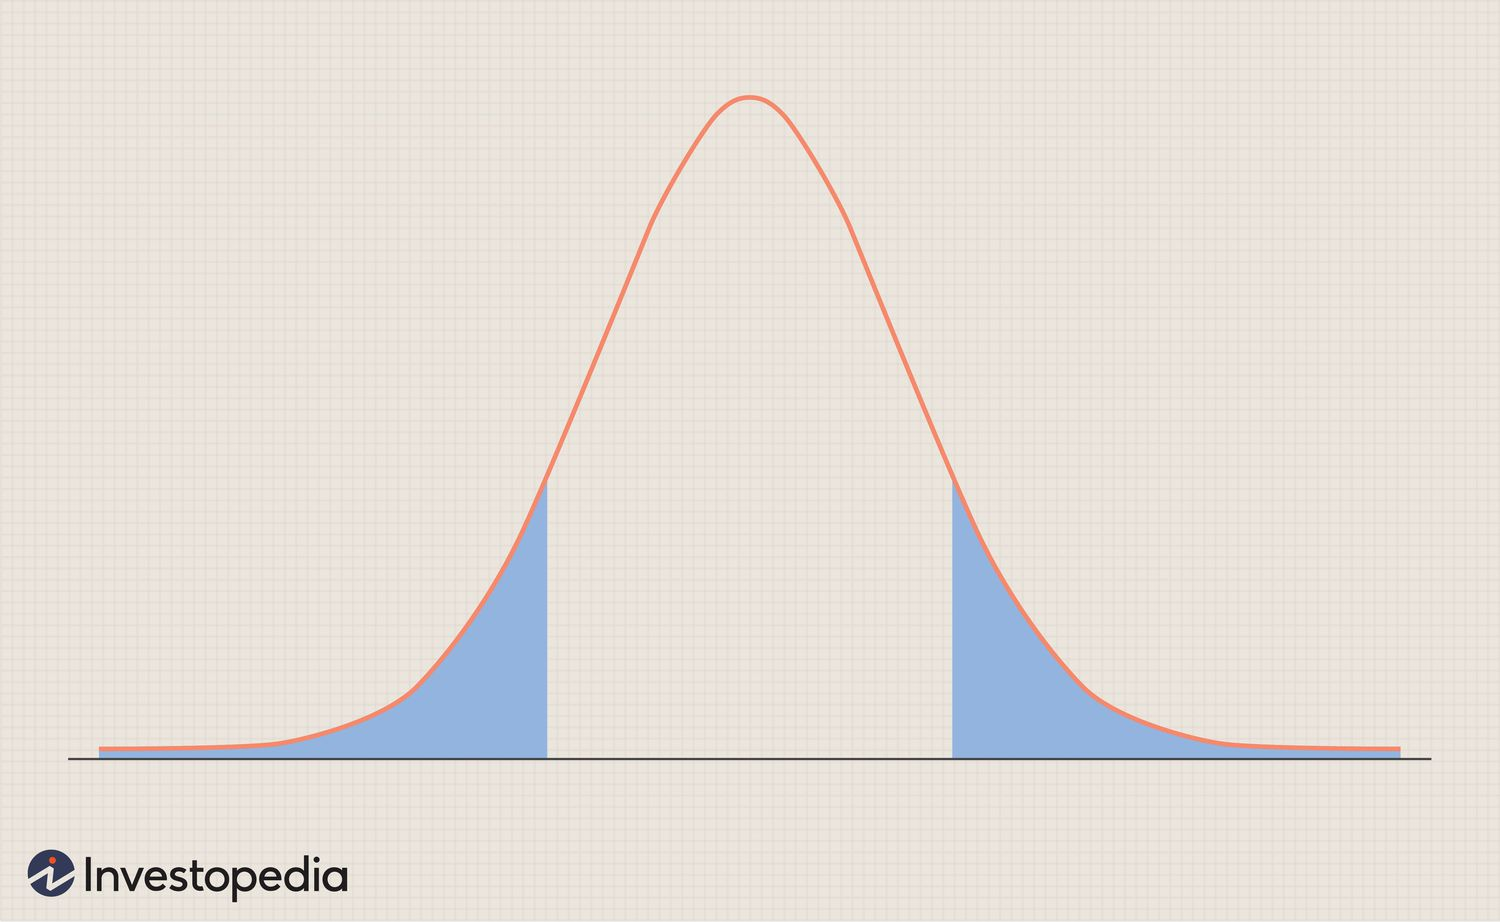

### Lets start applying this to our data. You will soon see that doing a t-test in python is really only 1 line of code. The hard part is really just figuring out what question you want to ask and whether or not a t-test is an appriate tool.

### Lets compare the ages of people that had a heart stroke and those that didn't and see if there is a statistical difference. What we are really doing using a t-test is comparing the means of the two groups and seeing if there is a difference.

### As these two groups are not related or paired and we are not comparing to a single value, we will use an independent t-test. 

### First, lets extract the ages of the heart stroke individuals and do some quick visualization

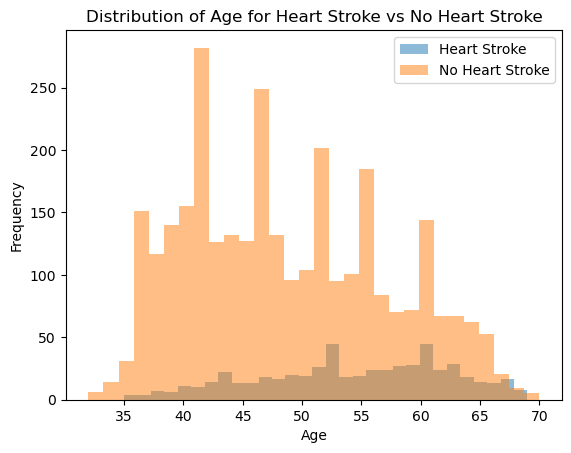

In [3]:
# We're going to divide the dataframe into two separate groups based on whether or not they had a heart stroke.
group1 = df[df['Heart_stroke'] == 1]['age']  # Age of individuals who had a heart stroke
group2 = df[df['Heart_stroke'] == 0]['age']  # Age of individuals who didn't have a heart stroke

# We're making a histogram, which is kind of like a bar chart that helps us see how data is spread out. 
# The alpha parameter is used to set the transparency level of the plot.
# Bins determines how many bars the x data gets binned by
plt.hist(group1, bins=30, alpha=0.5, label='Heart Stroke')
plt.hist(group2, bins=30, alpha=0.5, label='No Heart Stroke')

plt.legend(loc='upper right')  # Add a legend to the plot
plt.xlabel('Age')  # Add a label to the x-axis
plt.ylabel('Frequency')  # Add a label to the y-axis
plt.title('Distribution of Age for Heart Stroke vs No Heart Stroke')  # Add a title to the plot
plt.show()  # Display the plot


### Now lets do a t test using the groups we just defined using the `ttest_ind` method from scipy (which we imported at the to using `from scipy.stats import ttest_ind`). We will print out the t statistics and p value!

In [4]:
# Perform a t-test to compare the means of both groups. ttest_ind returns two values: 
# t-statistic (a measure of the difference between the two means relative to the variability in the data) and 
# p-value (probability of observing a t-statistic as extreme as the one calculated if the null hypothesis was true).
t_stat, p_val = ttest_ind(group1, group2)


# The t-statistic is like the score in a game - a big number (positive or negative) shows a clear winner, or in our case, a clear difference.
# The p-value is a bit like the odds of getting a score that extreme if there was no real difference.
# A small p-value (usually less than 0.05) suggests that the difference we see isn't just due to random chance
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_val}')

T-statistic: 14.536366222925679
p-value: 1.3893803444427658e-46




### The t-statistic of 14.5 and p-value of 1.3e-46 obtained from performing an independent t-test on the age of people with and without heart stroke indicate a statistically significant difference between the two groups. 

### The t-statistic measures the difference between the means of the two groups relative to the variability in the data. In this case, a t-statistic of 14.5 suggests a large difference between the average ages of individuals with and without heart stroke.

### The p-value represents the probability of observing a t-statistic as extreme as the one calculated if the null hypothesis (no difference between the groups) was true. A p-value of 1.3e-46, which is extremely small, indicates strong evidence against the null hypothesis. Therefore, we can conclude that there is a significant difference in age between individuals with and without heart stroke and accept the alternative hypothesis.

### These results suggest that age may be a significant factor in the occurrence of heart stroke. This finding makes sense with our medical knowledge as well, which is a nice reassurance!


### Let's do another t-test now, but this time comparing the total cholesterol levels of people with and without heart stroke. We will essentially follow the same procedure as above for this and only change the variable names

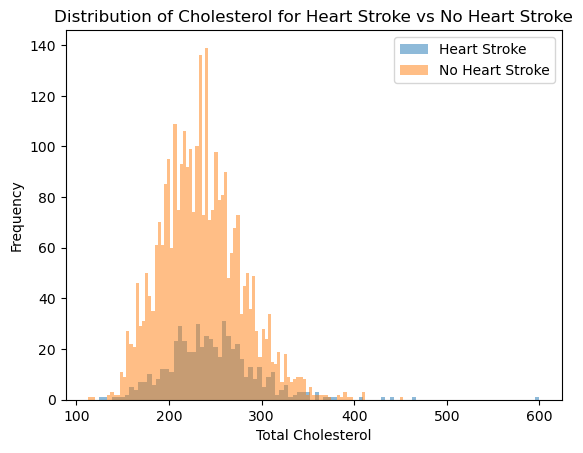

In [5]:
# We'll split our data into two groups: 'Current Smoker' and 'Non-Smoker'
group1 = df[df['Heart_stroke'] == 1]['totChol']  # This holds the cholesterol data of current smokers
group2 = df[df['Heart_stroke'] == 0]['totChol']  # This holds the cholesterol data of non-smokers

# We're making a histogram, which is kind of like a bar chart that helps us see how data is spread out 
# The alpha parameter is used to set the transparency level of the plot.
# Bins determines how many bars the x data gets binned by
plt.hist(group1, bins=100, alpha=0.5, label='Heart Stroke')
plt.hist(group2, bins=100, alpha=0.5, label='No Heart Stroke')

plt.legend(loc='upper right') # Add a legend to the plot
plt.xlabel('Total Cholesterol') # Add a label to the x-axis
plt.ylabel('Frequency') # Add a label to the y-axis
plt.title('Distribution of Cholesterol for Heart Stroke vs No Heart Stroke')  # Add a title to the plot

# This line of code makes the chart pop up so we can see it
plt.show()

In [6]:
# Here's where we run a t-test to see if there's a real difference between the two groups or if it's just random chance.
# It returns two things: the t-statistic and the p-value.
t_stat, p_val = ttest_ind(group1, group2)

# Print the t-statistic and p-value. The p-value is commonly used in hypothesis testing to help you support or reject the null hypothesis. 
# It represents the probability that the results of your test occurred at random. If p-value is low (commonly below 0.05), it suggests 
# that the null hypothesis is unlikely to be true, and that the difference in the group means is statistically significant..
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_val}')

T-statistic: 5.531474439833636
p-value: 3.398308583622179e-08


### Another statistically different result. If you look at the histogram, however you will see that the peaks overlap at pretty much the same place. You will also notice that there is a large outlier for the heart stroke condition that might skew our average. It would be nice to retest our data doing some exclusion of outliers to see if we still get a significant result

### There are lots of ways to determine what boundaries you use to define outliers (standard deviations above the mean, interquartile range, Z score, etc.) and we don't have time to go into all of them. We will quickly show you an implementation of using the interquartile range (IQR) to determine outliers.
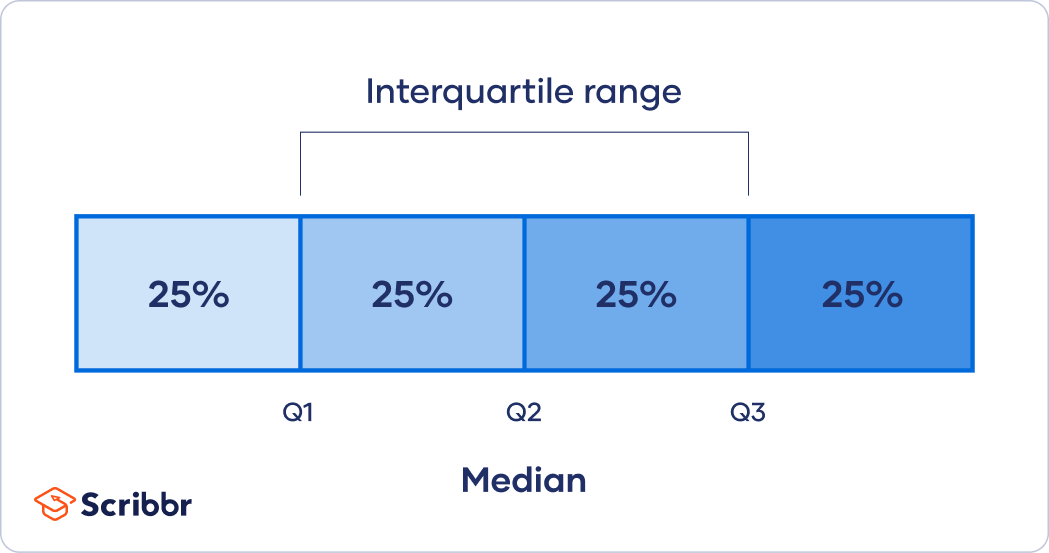

### The IQR is the difference between the 3rd quartile and the 1st quartile. As such, a standard way to define outliers is to exclude values that are below the first quartile minus 1.5 times the IQR and above the third quartile plus 1.5 times the IQR. This is a blanket method that removes data points far away from the mean.

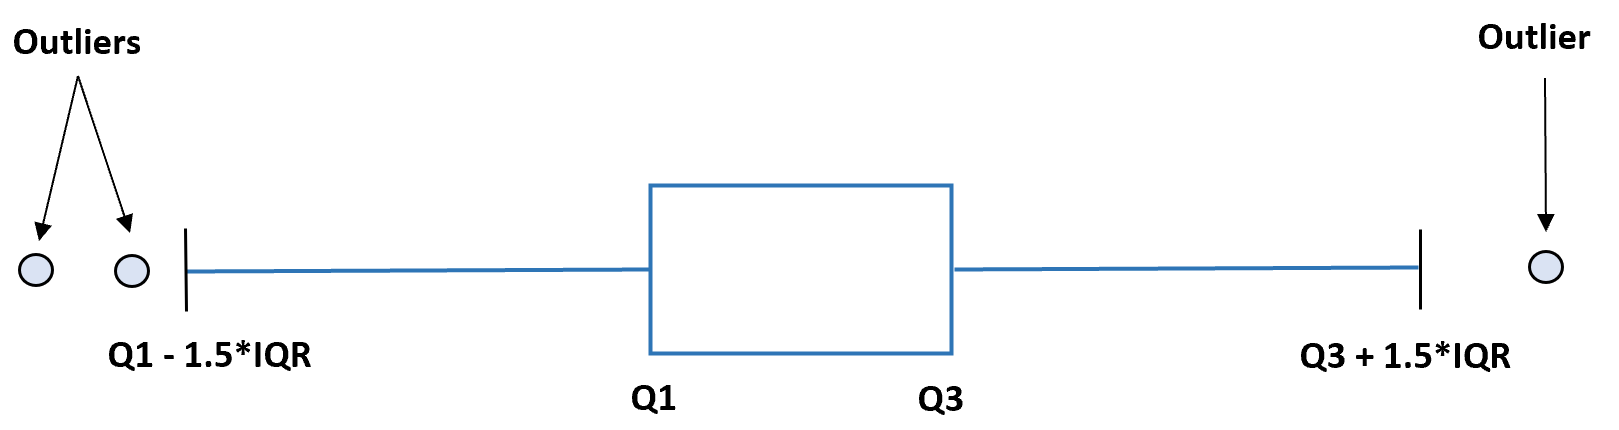

### Lets rerun the analysis exlcuding outliers to see what we get and whether or not our observations hold up

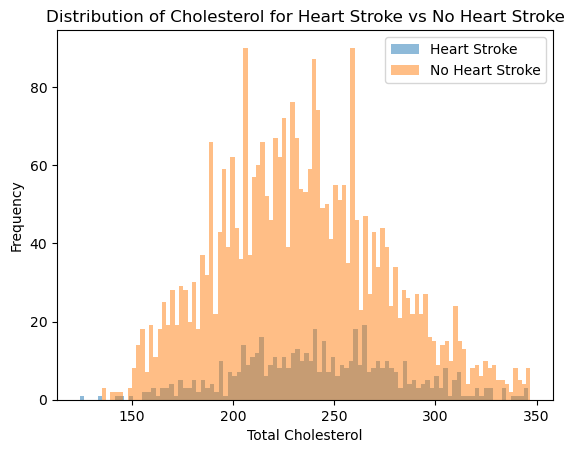

T-statistic: 4.485147000184371
p-value: 7.513281985516768e-06


In [7]:
# Compute the IQR for cholesterol data using built in quantile method from pandas
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers using 1.5 as a scalar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the dataframe using boolean series 
filtered_df = df[(df['totChol'] >= lower_bound) & (df['totChol'] <= upper_bound)]

# Split the filtered data into two groups: 'Heart Stroke' and 'No Heart Stroke'
group1 = filtered_df[filtered_df['Heart_stroke'] == 1]['totChol']  # Cholesterol data for those with heart stroke
group2 = filtered_df[filtered_df['Heart_stroke'] == 0]['totChol']  # Cholesterol data for those without heart stroke

# Now, the rest remains the same:
plt.hist(group1, bins=100, alpha=0.5, label='Heart Stroke')
plt.hist(group2, bins=100, alpha=0.5, label='No Heart Stroke')

plt.legend(loc='upper right') # Add a legend to the plot
plt.xlabel('Total Cholesterol') # Add a label to the x-axis
plt.ylabel('Frequency') # Add a label to the y-axis
plt.title('Distribution of Cholesterol for Heart Stroke vs No Heart Stroke')  # Add a title to the plot

plt.show()
# Here's where we run a t-test to see if there's a real difference between the two groups or if it's just random chance.
# It returns two things: the t-statistic and the p-value.
t_stat, p_val = ttest_ind(group1, group2)

# Print the t-statistic and p-value. The p-value is commonly used in hypothesis testing to help you support or reject the null hypothesis. 
# It represents the probability that the results of your test occurred at random. If p-value is low (commonly below 0.05), it suggests 
# that the null hypothesis is unlikely to be true, and that the difference in the group means is statistically significant..
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_val}')


### After removing outliers, we still observe a statistical difference in cholesterol levels of patients with and without heart failure. This gives us an increased confidence in our test and its results, even if it looks like the distribution of data is similar by eye. 

### That being said, when describing your results in a manuscript careful interpretation of the test performed and the visual distribution would be very important! 


## **One Way Anova (analysis of variance)**

### T-tests are great, but lets do some ANOVAs. ANOVA is a tool used when we want to compare the means of more than two groups. Think of it as an extension of the t-test when we have more than two means we want to compare. If there's genuinely no difference among the group averages, the calculated F-statistic (our test value) would resemble what we'd expect purely by chance and we accept the null hypothesis.

### Just like t-tests, there are different types of ANOVAs depending on the specific question you are asking.

1. ### One-way ANOVA: When you are asking, "Are any of these group averages different from the others?", use a one-way anova

2. ### Two-way ANOVA (without replication):  When you are asking, "Is there a difference in the mean outcomes based on two factors?", but there's only one observation for each combination, use a two way with no replication

3. ### Two-way ANOVA (with replication): If you think you need a two-way anova but you have multiple observations per combination (like re-testing the same scenario multiple times), use a two-way with replication

4. ### Repeated Measures ANOVA:  When you are asking, "After repeated measurements or over time, are the means changing", especially when the same participants are under different conditions, use a repeated measures (e.g. a longitudinal study)

### An ANOVA outputs the following results, which are explained here in brief

- ### F-statistic: States if the means between  groups are statistically different. A larger F-statistic (>1) indicates a larger difference between the means relative to the variability within the groups.

- ### P-value: Used to determine the significance of the results (similar to a t-test). A p-value less than the significance level (commonly .05) is considered statistically significant, meaning there is sufficient evidence to reject the null hypothesis that the group means are the same.

- ### Post-hoc Testing: If your ANOVA returns a significant result, you might want to figure out which groups are different from which others (as remember, ANOVAs compare the measn of multiple groups). Post-hoc tests, (Tukeys, Bonferroni correction), can help you make these comparisons, and we will show some examples of this later


### The numerous different types of ANOVAs can make it hard to know when to use the right one, so make sure to refine the question you are asking and always ask a stats person for help when needed (note: you are on your way to becoming the stats person, however).

### Ok that was a lot. Lets try this out on our data. Similar to the t-test, we will see the actual ANOVA gets run with only line of code. As this is easy, it really highlights the importance of knowing your data and what hypothesis you are actually trying to test.

### Lets start with seeing whether or not there is any difference in cholesterol levels between indivduals of different education levels.

### First lets take a look at the relationship between cholesterol levels and education using a box plot.

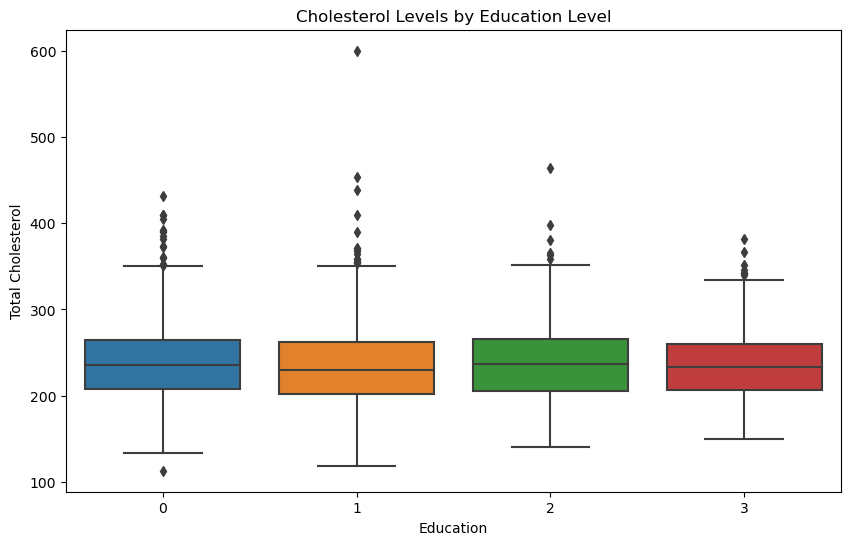

In [8]:
# First, we're creating a box plot which is a type of graph that gives us a good summary of the data. 
# We're looking at cholesterol levels grouped by education levels.
plt.figure(figsize=(10,6)) # Making the plot a good size so it's easier to read
sns.boxplot(x='education', y='totChol', data=df) # We're using the seaborn library (sns) to create our box plot

plt.xlabel('Education') # Add a label to the x-axis- remember we mapped the levels to numbers in our preprocessing step
plt.ylabel('Total Cholesterol') # Add a label to the y-axis
plt.title('Cholesterol Levels by Education Level') # Add a title to the plot

plt.show() # Show the plot!


### Now lets run the test. As we want to see if there is any difference in cholesterol levels, we will first separate the data up into 4 groups corresponding to different levels of education.

### We are asking the question here 'are any of these groups means different from the others', so we will use a one way ANOVA via the `f_oneway` method from `scipy`.

In [9]:
# Next, we're grouping our cholesterol data by the education categories
group1 = df[df['education'] == 0]['totChol'] #  uneducated individuals
group2 = df[df['education'] == 1]['totChol'] # individuals that only went to primary school
group3 = df[df['education'] == 2]['totChol'] # individuals that graduated
group4 = df[df['education'] == 3]['totChol'] # individuals that went beyond graduation

# Now we're going to use a one way ANOVA test. This is a way to see if there's a significant difference between the average cholesterol levels in these groups.
# If the p-value is small (usually less than 0.05), then we can say the difference is not just by chance.
f_val, p_val = f_oneway(group1, group2, group3, group4)

# Print the results! The F-value is like the score of the game - a big number (positive or negative) shows a clear winner or difference
print(f'F-value: {f_val}')
print(f'p-value: {p_val}') # The p-value is like the odds of getting this score if there's no real difference. A small p-value means the difference is likely not due to chance


F-value: 1.2474439970966675
p-value: 0.290832384956388


### Following the ANOVA we see an F-value greater than 1, and a p-value greater than .05. This implies that there is no difference among the means of the groups compared, and we can reject the alternative hypothesis and accept the null hypothesis!

### Lets do another example. We might hypothesize that the blood pressure will be higher with people that have higher BMIs. We can test this by first slightly reorganizing our data, and then performing a one way ANOVA the same way we just did.

### Lets start by making a new, smaller dataset tht contains only the information we want (BMI, systolic blood pressure) as well as a new column called BP_category. In this new column we will put a label that demarcates the blood pressure category the individual falls in. There is some new pandas syntax in here, so be sure to check the documentation of what exactly `pd.cut` is doing.

In [10]:
# First, we're focusing on only two variables from our dataset: systolic blood pressure (sysBP) and BMI.
df_new = df[['sysBP', 'BMI']] #create a new df containing only a subset of the original (systolic BP and BMI)

# # We are creating bins or groups for different ranges of systolic blood pressure.
# bins = [0, 90, 120, 130, 160, np.inf]
# labels = ['<90', '90-119', '120-129', '130-159', '>160']


# We are creating bins or groups for different ranges of systolic blood pressure.
bins = [0, 100, 130, 160, np.inf]
labels = ['<100', '101-129', '130-159', '>160']

# Now, we're adding a new column to our data that tells us which blood pressure group each person falls into. 
# You can take a look at some of the pandas documentation to see how this works under the hood
df_new['BP_category'] = pd.cut(df_new['sysBP'], bins=bins, labels=labels)

# Let's see how it looks
print(df_new.head())

   sysBP    BMI BP_category
0  106.0  26.97     101-129
1  121.0  28.73     101-129
2  127.5  25.34     101-129
3  150.0  28.58     130-159
4  130.0  23.10     101-129


/var/folders/cy/r57v8qdj4f5_mg9q7pmcfbjr0000gn/T/ipykernel_40609/1257290612.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['BP_category'] = pd.cut(df_new['sysBP'], bins=bins, labels=labels)


### Now lets visualize the BMI of the patients based on their blood pressure category (before we made this new dataframe we only had a systolic BP column, so this box plot (and the subseqent ANOVA) would not have been possible!)

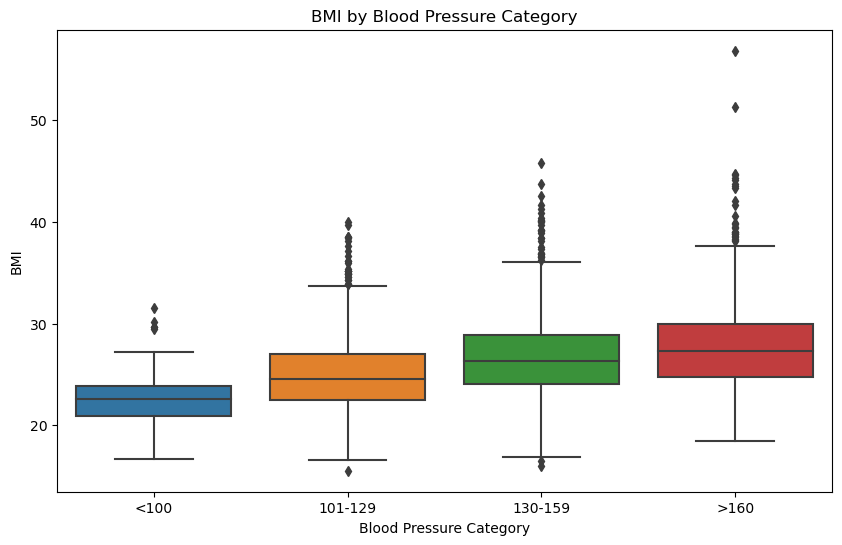

In [11]:
# un comment to see the counts of the new df
# # Also, let's check how many people fall into each blood pressure group.
# print(df_new['BP_category'].value_counts())

# Now, we're going to create a box plot of BMI across the different blood pressure categories. 
plt.figure(figsize=(10,6))
sns.boxplot(x='BP_category', y='BMI', data=df_new, order=labels)

plt.xlabel('Blood Pressure Category') # Add a label to the x-axis
plt.ylabel('BMI') # Add a label to the y-axis
plt.title('BMI by Blood Pressure Category') # Add a title to the plot

plt.show() # Show the plot!

### By eye, this data looks like there might be a difference here. Lets do our ANOVA and test this using statistics

In [12]:
# Now, we want to see if there's a significant difference in the average BMI across our blood pressure groups. 
# To do this, we're using an ANOVA test. This test gives us a p-value, which is a number that helps us figure out if the differences we see in the averages are significant or not.
fvalue, pvalue = f_oneway(df_new[df_new['BP_category'] == '<100']['BMI'],
                                 df_new[df_new['BP_category'] == '101-129']['BMI'],
                                #  df_new[df_new['BP_category'] == '120-129']['BMI'],
                                 df_new[df_new['BP_category'] == '130-159']['BMI'],
                                 df_new[df_new['BP_category'] == '>160']['BMI'])

# Let's print the results!
print('F-value:', fvalue) # F-value is just a measure that ANOVA test gives us. 
print('p-value:', pvalue) # The smaller the p-value, the more confident we can be that the differences we see are significant and not just due to random chance.

F-value: 124.93275429068143
p-value: 4.935413858860698e-77


### Interesting! We got a very high F-value of 124 and a *very* low p-value of 4x10^-77 indicating that there is a statistically difference between our groups.

### What does this really mean though? It means that at least one of the groups averages is significantly different from the others. The ANOVA, however, does NOT tell us which group(s) are the interesting ones! To do that we have to do a post hoc analysis.

### Like most things in data science, there are multiple ways to accomplish this goal. We will talk about Tukey's Honestly Significant Difference (HSD) test and Bonferroni correctio as they are some of the more common ways


### Tukey's HSD Test is used when you are comparing all possible pairs of means. It is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other, and maintains the family-wise error rate at a desired level (usually 0.05). 

### Bonferroni Correction, on the other hand, is used when you are doing multiple pairwise comparisons, but not necessarily all possible comparisons. It adjusts the p-value threshold downwards by the number of tests to maintain the overall error rate. It's a very conservative test, and as such, it reduces the chance of obtaining significant results by chance (false positives), but at the same time it may increase the likelihood of missing a true effect (false negatives).

### We compared all possible pairs of means in the ANOVA and want to understand which ones are different. As such, lets implement Tukeys HSD as our post-hoc analysis

###  A running theme at this point is that the actual coding is very easy! Tukeys HSD is one line of code, it is really knowing about what tool to use and when to use it. This intuition will come with time, but you are well on your way.

In [13]:
# Perform the Tukey's HSD test
# 'df_new['BMI']' refers to the measurement we're interested in (BMI)
# 'df_new['BP_category']' represents the different groups we're comparing (BP categories)
# 'alpha=0.05' sets the statistical significance level for the test
posthoc = pairwise_tukeyhsd(df_new['BMI'], df_new['BP_category'], alpha=0.05)

# Print out the results of the test
# This will give us a detailed table showing whether there's a significant difference
# between the mean BMI of each pair of BP categories
print(posthoc)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
101-129 130-159   1.8262   0.0  1.4653   2.187   True
101-129    <100  -2.1312   0.0 -3.2108 -1.0517   True
101-129    >160   3.2718   0.0  2.7164  3.8271   True
130-159    <100  -3.9574   0.0 -5.0493 -2.8654   True
130-159    >160   1.4456   0.0  0.8665  2.0248   True
   <100    >160    5.403   0.0  4.2323  6.5737   True
-----------------------------------------------------


### Awesome! We can see in the posthoc table that the test iterates through every comparison of the means and then will report in the last column whether we can accept or reject the null hypothesis (p-adj shows the p value). Based on this we can reject every null hypothesis

### While this is super exciting and does make sense within the context of the data, it is worth noting that we implemented the most basic approach here. When doing one way ANOVAs, one of the assumptions of the test is that there is homogeneity of variance within the data (means that the distribution of population variances is evenly spread around the mean) . **We did not check that here, and that would be a *mistake* in the real world (it is easy to do using a test called Levene's test)**. If the data fails Levene's test other statistical tests may need to be relied on instead of an ANOVA, but we don't have time to get into all of that right now (you should google, though!). We just want to demonstrate the workflow of doing stats on big data, but we also want to make sure you aware that there are caveats with every decision you make, and it is important to ensure you are armed with all the appropriate tools before going into battle.

## **Categorical Hypothesis Testing**

### Both the Chi-Squared test and Fisher's Exact test are used for analyzing categorical data, particularly to examine the relationship between two categorical variables. These tests are very, very similar and will tell you if two categorical variables are independent (not reliant) on each other. 

### For both tests, contingency tables are used. Contingency tables are just tabular represntations of categorical variables.

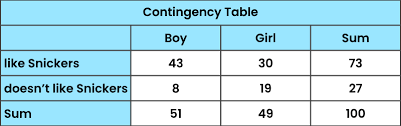

### The main difference in these tests is the size of the data they should be used on. Chi squared tests are commonly used on contingency tables larger than 2x2 (but can also be used for 2x3 sized tables) and when the observed frequencies are large (>5 as a rule of thumb for each cell in the contingency table). Fischer's exact test is used for smaller sample sizes and primarily in 2x2 tables.


### The whole point of these tests is to determine if categorical variables are indepdent (unrelated) to each other. 
1. ### Chi squared tests measure this using the chi-squared statistic and a p value (<= .05 allows rejection of the null hypothesis). A large chi-squared statistic relative to its degree of freedom suggests that the observed and expected frequencies are different, meaning the variables aren't independent. 
2. ### Fischer's exact test reports a p-value (<= .05 allows rejection of the null hypothesis) as well as an odds ratio. An odds ratio is the odds the observation occurs given an exposure relative to baseline.

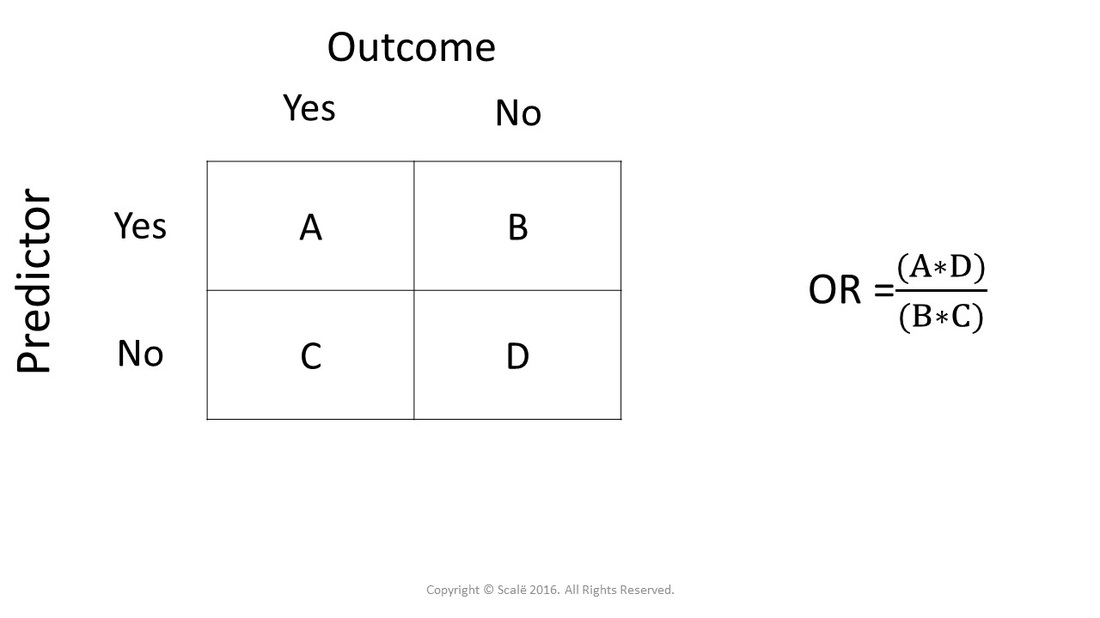

### Lets first make a contingency table to look at the relationship between gender and heart stroke status

In [14]:
# Create a contingency table
# A contingency table is a type of table that shows the frequency distribution of the variables.
# In this case, we're looking at the frequencies of gender (male (1) or female (0)) and heart stroke status (yes or no).
contingency_table = pd.crosstab(df['Gender'], df['Heart_stroke']) 

print(contingency_table) # Print the contingency table

Heart_stroke     0    1
Gender                 
0             1315  307
1             1784  250


### Since we have more than 5 observations for each cell, a chi squared test is appropriate here even though this is a 2x2 contingency table. Let's do the chi squared test using the `chi2_contingency` method from `scipy`

In [15]:
# Perform the Chi-Squared test
# The Chi-Squared test is a statistical test that can tell us if there is a significant association between two categorical variables.
# chi2: The test statistic that follows a Chi-square distribution
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the expected frequency distribution.
print('Expected contingency table:\n',expected) # Print the expected frequency distribution.


# Print the results
# The p-value tells us the probability of observing a test statistic as extreme as chi2, assuming the null hypothesis is true.
# If the p-value is small (typically ≤ 0.05), it indicates strong evidence to reject the null hypothesis.
# Here, the null hypothesis is that 'Gender' and 'Heart_stroke' are independent.
# The degrees of freedom is the number of values in the final calculation that are free to vary.
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Expected contingency table:
 [[1374.8845733  247.1154267]
 [1724.1154267  309.8845733]]
Chi-square statistic: 30.261278459701792
P-value: 3.7758919146380037e-08
Degrees of freedom: 1


### Lets break this down. `expected` is the expected frequency distribution given if gender and heart stroke status were truly indepedent. Chi squared statistic represents the difference between the observed data and what we would expect if gender and heart stroke status were independent, the p value is the p value, and the degrees of freedom is the number of values in the chi squared calculation free to vary (calculated by (# rows - 1) * (# columns -1) = (2-1) * (2-1) = 1).

### Based on our very high chi squared statistic and our low p value, we can derive from this that gender and heart stroke status are significantly associated in our dataset.

### Now we don't really have to do this because the chi-squared test was good for our data, but lets do Fischer's exact now just to show the syntax and see what we get

In [16]:
# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

print('Odds Ratio:', odds_ratio)
print('p-value:', p_value)

Odds Ratio: 0.6002505075882619
p-value: 3.306137201484809e-08


### Based on Fisher's Exact Test, there is a significant association (p=3.3x10^-8) between gender and heart stroke status, consistent the chi squared test. The odds of having a heart stroke for males (0 in the contingency table) are approximately 60% of the odds for females (1 in the contingency table). This implies that based on our data, females are more likely to have heart stroke than males! A nice finding of the data.



## **Outro**

### This concludes the section on hypothesis testing. Here we actually drew some statistically significant conclusinos about the data, including a difference in cholesterol levels of those with and without heart stroke (t-test), average age of people with heart stroke (t-test), that BMI is is significantly different among different systolic blood pressure bins (ANOVA), and that female gender is significantly associated with heart stroke (chi squared and fischer exact). 

### There is undoubtedbly SO much more to be pulled from this, and there are even further confirmatory analyses that could expand what we already did. We hope, however, that this template for how to work through data and do some basic statistical tests will give you a launchpad to begin exploring your own data. Remember- coding is easy, knowing which test to do can be hard! Make sure to consult other data science specific resources to get a more broad picture of the field if you have questions not answered here.